In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
pdde = pd.read_csv("/content/drive/MyDrive/롯데 공모전/dataset/LPOINT_BIG_COMP_02_PDDE.csv") #상품 구매 정보(유통사 상품 구매 내역)
copu = pd.read_csv("/content/drive/MyDrive/롯데 공모전/dataset/LPOINT_BIG_COMP_03_COP_U.csv") #제휴사 이용 정보(제휴사 서비스 이용 내역)
pd_clac = pd.read_csv("/content/drive/MyDrive/롯데 공모전/dataset/LPOINT_BIG_COMP_04_PD_CLAC.csv") #상품 분류 정보(유통사 상품 카테고리 마스터)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### 상품 분류 정보

In [ ]:
pdde.cop_c.unique()

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06'], dtype=object)

In [ ]:
pdde.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


In [ ]:
pdde[pdde['pd_c']=='PD0001']['buy_am']

1172       2960000.0
3278       2780000.0
3603        300000.0
3606        300000.0
3756       3174000.0
             ...    
4343921     277000.0
4345099     923000.0
4346620     339000.0
4351182     798000.0
4381067     998000.0
Name: buy_am, Length: 313, dtype: float64

상품 구매 정보의 구매 금액은 각 상품의 금액이 아닌 것 같다

+ 한 영수증에 포함된 구매 항목들
+ 특정 항목들이 함께+자주 구매되는 것들이 있을까 ?

In [ ]:
a = pd.DataFrame(pdde['pd_c'].value_counts())
a = a.reset_index()
a = a.rename(columns={'index': 'pd_c','pd_c':'count'})
a.head()

,pd_c,count
0,PD0232,95092
1,PD1484,88584
2,PD1156,80265
3,PD0403,61778
4,PD0228,56699


In [ ]:
pd_clac2 = pd.merge(a, pd_clac) #상품 코드의 구매 횟수 포함
pd_clac2.head()

,pd_c,count,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0232,95092,일반스낵,과자,스낵류
1,PD1484,88584,종량제봉투,청소/세탁/욕실용품,청소용품
2,PD1156,80265,일반우유,유제품,우유
3,PD0403,61778,국물봉지라면,대용식,봉지라면
4,PD0228,56699,감자스낵,과자,스낵류


In [ ]:
pd_clac2[:20]

,pd_c,count,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0232,95092,일반스낵,과자,스낵류
1,PD1484,88584,종량제봉투,청소/세탁/욕실용품,청소용품
2,PD1156,80265,일반우유,유제품,우유
3,PD0403,61778,국물봉지라면,대용식,봉지라면
4,PD0228,56699,감자스낵,과자,스낵류
5,PD0480,56412,기타파티/팬시용품,문구/사무용품,파티/팬시용품
6,PD1387,54862,두부류,채소,두부/콩나물류
7,PD1486,52154,일반계란,축산물,계란류
8,PD0413,48168,국물용기라면,대용식,용기라면
9,PD1330,46616,국산맥주,주류,맥주


먹거리가 많다

In [ ]:
pd_clac2['clac_hlv_nm'].unique()

array(['과자', '청소/세탁/욕실용품', '유제품', '대용식', '문구/사무용품', '채소', '축산물', '주류',
       '과일', '음료', '남성의류', '기타(비상품)', '냉장식품', '테넌트/음식점', '여성의류', '냉동식품',
       '담배', '조미료', '조리식품', '주방잡화', '스포츠패션', '세제/위생', '퍼스널케어', '건해산물',
       '생활/렌탈서비스', '패션잡화', '수산물', '커피/차', '병통조림', '유아식품', '화장품/뷰티케어',
       '양곡', '공구/안전용품', '원예/애완', '유아동의류', '아웃도어/레저', '완구', '상품권',
       '속옷/양말/홈웨어', '건강용품', '식기/조리기구', '건강식품', '침구/수예', '헬스/피트니스',
       '출산/육아용품', '여행/레저서비스', '구기/필드스포츠', '자동차용품', '서적/음반/악기', '컴퓨터',
       '인테리어/조명', '모바일', '영상/음향가전', '생활/주방가전', '가구', '시즌스포츠', '냉장/세탁가전',
       '계절가전', '기타상품', '금융/보험서비스'], dtype=object)

In [ ]:
pd_clac2['clac_mcls_nm'].unique()

array(['스낵류', '청소용품', '우유', '봉지라면', '파티/팬시용품', '두부/콩나물류', '계란류', '용기라면',
       '맥주', '수입과일', '요구르트', '비스킷류', '생수', '소주', '가공유', '남성의류세트', '임대매출',
       '어묵/맛살', '커피음료', '빵', '양채류', '유가공품', '햄/소시지', '사탕/캔디', '식당',
       '탄산음료', '과채음료', '냉장음료', '레토르트', '국산과일', '여성의류상의', '냉동간편식', '일반담배',
       '열매채소', '소스류', '파이류', '베이커리', '푸드코트', '잡화균일가', '아이스크림', '잎채소',
       '기능성음료', '차음료', '초콜릿', '남성의류상의', '시리얼', '전통주', '와인', '냉장간편식',
       '포장반찬', '국산돼지고기', '버섯류', '냉장조리', '기타', '남성스포츠화', '화장지/티슈',
       '여성위생용품', '해조류', '생활서비스', '뿌리채소', '양념육', '여성의류세트', '패션액세서리', '연체류',
       '견과류', '전통과자류', '여성의류아우터', '디저트', '인스턴트커피', '수산물통조림', '남성일반스포츠의류',
       '닭고기류', '건면', '즉석음료류', '유아간식', '세탁세제', '스킨케어', '주방정리용품/소모품', '장류',
       '쌀', '떡', '전기용품', '나물류', '애견용품', '농산물병통조림', '어류', '헤어케어', '조미료류',
       '구강케어', '두유', '남아의류상의', '주방세제', '기타아웃도어/레저', '국산소고기', '껌', '남아완구',
       '유아식', '조개류', '모바일상품권', '축산물통조림', '원두커피', '바디케어', '잡곡', '여성의류전신',
       '간편조리', '건어물', '식용유류', '잼', '여성속옷', '여아의류상의', '교육완구', '일

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

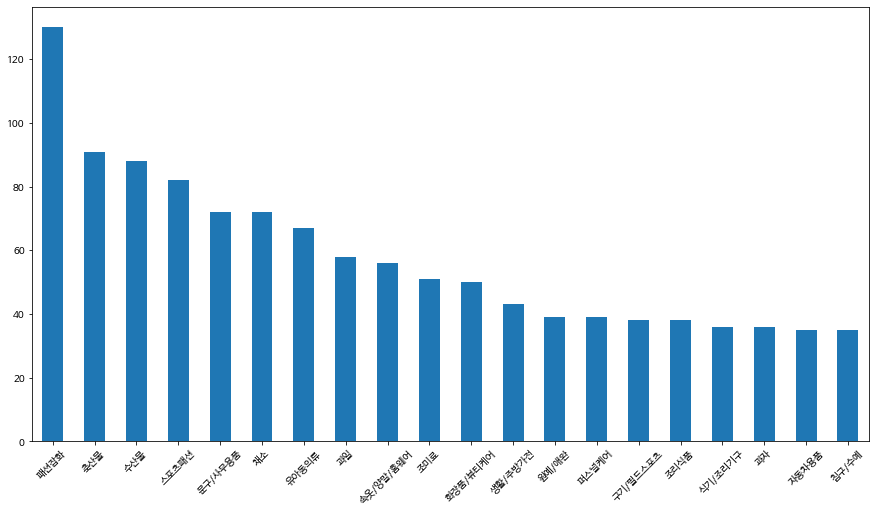

In [ ]:
pd_clac2['clac_hlv_nm'].value_counts()[:20].plot(kind='bar', figsize=(15,8))
plt.xticks(rotation=45)

패션잡화 압도적, 축산물, 수산물, 스포츠패션, 문구/사무용품

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

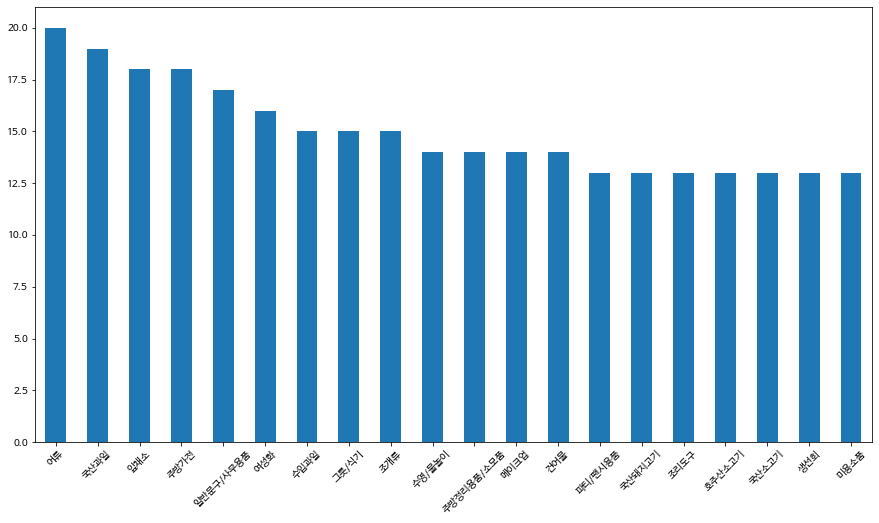

In [ ]:
pd_clac2['clac_mcls_nm'].value_counts()[:20].plot(kind='bar', figsize=(15,8))
plt.xticks(rotation=45)

### 제휴사 이용 정보

In [ ]:
copu.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500
